In [56]:
import requests
import datetime
import pandas as pd
import calendar
import numpy 
import matplotlib.pyplot as plt
import urllib.request
import json
%matplotlib inline
key = "x"

In [51]:
def historical_data(pair, currency, days):
    
    url_btc='https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&toTs=1614198387&api_key=key'.format(pair,currency,days)
    response_btc = urllib.request.urlopen(url_btc)
    raw_json_btc = response_btc.read().decode("utf-8")
    data_btc = json.loads(raw_json_btc)
    df = pd.DataFrame(data_btc['Data'])
    df.time = df.time.apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d'))
    df['time']=pd.to_datetime(df['time'])
    df['date']=df['time']
    df['time']=df['time'].dt.weekday

    days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
    df['time'] = df['time'].apply(lambda x: days[x])

    df['returns'] = numpy.log (df.close/df.close.shift(1))
    df.head()
    df=df.dropna()
    
    
    return df

In [52]:
df= historical_data("BTC", "USD", 2000)
df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,date,returns
1,Sat,235.61,228.29,230.25,48280.18,11253257.52,233.67,direct,,2015-09-05,0.014744
2,Sun,243.64,234.74,233.67,66271.08,15939620.21,239.86,direct,,2015-09-06,0.026146
3,Mon,242.66,237.49,239.86,57187.93,13744695.27,239.58,direct,,2015-09-07,-0.001168
4,Tues,246.38,239.23,239.58,76353.97,18605471.98,243.24,direct,,2015-09-08,0.015161
5,Weds,244.34,236.49,243.24,69263.89,16636258.68,237.41,direct,,2015-09-09,-0.024260


In [49]:
df_BTC= historical_data("BTC", "USD", 2000)
df_BTC['close']=df_BTC['close']/df_BTC['close'][1]
df_ETH= historical_data("ETH", "USD", 2000)
df_ETH['close']=df_ETH['close']/df_ETH['close'][1]
df_XRP= historical_data("XRP", "USD", 2000)
df_XRP['close']=df_XRP['close']/df_XRP['close'][1]
df_LTC= historical_data("LTC", "USD", 2000)
df_LTC['close']=df_LTC['close']/df_LTC['close'][1]

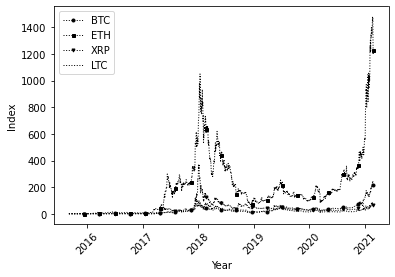

In [50]:
markers_on=[100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,1999]
fig =plt.figure()
plt.plot(df_BTC.date, df_BTC.close, linestyle=':',marker = 'o', color="black", label ="BTC", markevery=markers_on, markersize=3,linewidth=1)
plt.plot(df_ETH.date, df_ETH.close,linestyle=':', marker ='s',color="black", label="ETH",markevery=markers_on, markersize=3,linewidth=1)
plt.plot(df_XRP.date, df_XRP.close,linestyle=':', marker ='v',color="black", label ="XRP",markevery=markers_on, markersize=3,linewidth=1)
plt.plot(df_LTC.date, df_LTC.close,linestyle=':', color="black", label ="LTC",markevery=markers_on, markersize=3,linewidth=1)
plt.xticks(rotation=45)
plt.ylabel("Index")
plt.xlabel("Year")
plt.legend()

fig.savefig('test1.1.png', bbox_inches='tight', dpi = 1000)

In [53]:
def historical_data3(pair, currency, days2):
    
    for i in range(len(pair)):
        url_btc='https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&toTs=1614198387&api_key=key'.format(pair[i],currency,days2)
        response_btc = urllib.request.urlopen(url_btc)
        raw_json_btc = response_btc.read().decode("utf-8")
        data_btc = json.loads(raw_json_btc)
        df = pd.DataFrame(data_btc['Data'])
        df.time = df.time.apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d'))
        df['time']=pd.to_datetime(df['time'])
        df['date']=df['time']
        df['time']=df['time'].dt.weekday

        days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
        df['time'] = df['time'].apply(lambda x: days[x])

        df['returns'] = numpy.log (df.close/df.close.shift(1))
        df.head()
        df=df.dropna()
        df = df[['time', 'returns', 'date']]
        #df =df.groupby('date', as_index=False)['returns'].mean()
        df = df.rename(columns={'returns': 'returns_{}'.format(pair[i])})
        
        try:
            result = pd.merge(result,df,on=['date','time'])
        except:
            result =df
    result = result.set_index('date')        
    return result

In [54]:
df= historical_data3(["LTC"], "USD", 2000)
df.head()

,time,returns_LTC
date,,
2015-09-05,Sat,0.069043
2015-09-06,Sun,0.061959
2015-09-07,Mon,-0.000328
2015-09-08,Tues,-0.005268
2015-09-09,Weds,-0.045593


In [38]:
startvalue = 1000
df["portfolio_all_days"]=np.nan
df["portfolio_Fri_Sat"]=np.nan
df["portfolio_Fri"]=np.nan
df["portfolio_Sat"]=np.nan
df["portfolio_Mo_Tues_Weds_Thurs_Sun"]=np.nan
pd.options.mode.chained_assignment = None
#Portfolio long Friday and Saturday
for i in range(len(df)):
    if i == 0:
        df["portfolio_Fri_Sat"][i]=startvalue*np.exp(df["returns_LTC"][i])
    elif df["time"][i]== "Sat" or df["time"][i]== "Fri":
        df["portfolio_Fri_Sat"][i]= df["portfolio_Fri_Sat"][i-1]*np.exp(df["returns_LTC"][i])
    else:
        df["portfolio_Fri_Sat"][i]= df["portfolio_Fri_Sat"][i-1]
        
#Portfolio long all days
for i in range(len(df)):
    if i == 0:
        df["portfolio_all_days"][i]=startvalue*np.exp(df["returns_LTC"][i])
    else:
        df["portfolio_all_days"][i]= df["portfolio_all_days"][i-1]*np.exp(df["returns_LTC"][i])

#Portfolio long Friday
for i in range(len(df)):
    if i == 0:
        df["portfolio_Fri"][i]=startvalue*np.exp(df["returns_LTC"][i])
    elif  df["time"][i]== "Fri":
        df["portfolio_Fri"][i]= df["portfolio_Fri"][i-1]*np.exp(df["returns_LTC"][i])
    else:
        df["portfolio_Fri"][i]= df["portfolio_Fri"][i-1]

#Portfolio long Saturday
for i in range(len(df)):
    if i == 0:
        df["portfolio_Sat"][i]=startvalue*np.exp(df["returns_LTC"][i])
    elif df["time"][i]== "Sat": 
        df["portfolio_Sat"][i]= df["portfolio_Sat"][i-1]*np.exp(df["returns_LTC"][i])
    else:
        df["portfolio_Sat"][i]= df["portfolio_Sat"][i-1]
        
#Portfolio long Mo, Tues, Weds, Thurs, Sun
for i in range(len(df)):
    if i == 0:
        df["portfolio_Mo_Tues_Weds_Thurs_Sun"][i]=startvalue*np.exp(df["returns_LTC"][i])
    elif df["time"][i]== "Mo" or df["time"][i]== "Tues" or df["time"][i]== "Weds" or df["time"][i]== "Thurs" or df["time"][i]== "Sun": 
        df["portfolio_Mo_Tues_Weds_Thurs_Sun"][i]= df["portfolio_Mo_Tues_Weds_Thurs_Sun"][i-1]*np.exp(df["returns_LTC"][i])
    else:
        df["portfolio_Mo_Tues_Weds_Thurs_Sun"][i]= df["portfolio_Mo_Tues_Weds_Thurs_Sun"][i-1]
 
df.head(10)
    

,time,returns_LTC,portfolio_all_days,portfolio_Fri_Sat,portfolio_Fri,portfolio_Sat,portfolio_Mo_Tues_Weds_Thurs_Sun
date,,,,,,,
2015-09-05,Sat,0.069043,1071.482036,1071.482036,1071.482036,1071.482036,1071.482036
2015-09-06,Sun,0.061959,1139.970060,1071.482036,1071.482036,1071.482036,1139.970060
2015-09-07,Mon,-0.000328,1139.595808,1071.482036,1071.482036,1071.482036,1139.970060
2015-09-08,Tues,-0.005268,1133.607784,1071.482036,1071.482036,1071.482036,1133.980069
2015-09-09,Weds,-0.045593,1083.083832,1071.482036,1071.482036,1071.482036,1083.439525
2015-09-10,Thurs,0.012704,1096.931138,1071.482036,1071.482036,1071.482036,1097.291378
2015-09-11,Fri,0.002385,1099.550898,1074.041017,1074.041017,1071.482036,1097.291378
2015-09-12,Sat,-0.041347,1055.014970,1030.538335,1074.041017,1028.083002,1097.291378
2015-09-13,Sun,-0.008550,1046.032934,1030.538335,1074.041017,1028.083002,1087.949415


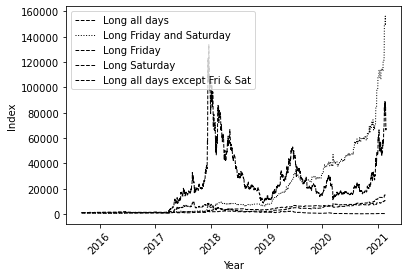

In [39]:
fig =plt.figure()
plt.plot(df.index, df.portfolio_all_days, linestyle='--', color="black",linewidth=1, label = "Long all days")
plt.plot(df.index, df.portfolio_Fri_Sat, linestyle=':', color="black",linewidth=1, label = "Long Friday and Saturday")
plt.plot(df.index, df.portfolio_Fri, linestyle='--', color="black",linewidth=1, label = "Long Friday")
plt.plot(df.index, df.portfolio_Sat, linestyle='--', color="black",linewidth=1, label = "Long Saturday")
plt.plot(df.index, df.portfolio_Mo_Tues_Weds_Thurs_Sun, linestyle='--', color="black",linewidth=1, label = "Long all days except Fri & Sat")
plt.xticks(rotation=45)
plt.ylabel("Index")
plt.xlabel("Year")
plt.legend()
plt.savefig('trading1.png',bbox_inches='tight')

In [41]:
spread = pd.read_excel(r'C:\Users\pasca\Desktop\Spread.xlsx')
#spread["Date"]=spread["Date"].dt.strftime("%Y-%m-%d")
#spread.set_index('Date', inplace = True)

spread =spread.set_index('Date')
spread.index = pd.to_datetime(df.index, format = '%m/%d/%Y')
spread["average_spread"]=(spread["bitfinex"]+spread["bitstamp"]+spread["coinbase"])/3
spread.head(10)

,bitfinex,bitstamp,coinbase,others,average_spread
date,,,,,
2015-09-05,0.042415,0.095967,0.014081,1.604837,0.050821
2015-09-06,0.049648,0.125494,0.014028,1.775731,0.063057
2015-09-07,0.035325,0.120720,0.015669,1.538053,0.057238
2015-09-08,0.062923,0.130992,0.018957,1.552235,0.070957
2015-09-09,0.033070,0.124779,0.013795,1.420925,0.057215
2015-09-10,0.067417,0.124315,0.019555,2.151707,0.070429
2015-09-11,0.076232,0.119869,0.019685,1.776403,0.071929
2015-09-12,0.044782,0.134616,0.013175,1.742370,0.064191
2015-09-13,0.044361,0.140906,0.015537,1.373798,0.066935


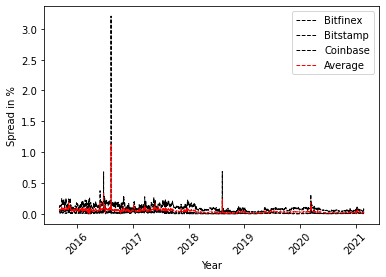

In [42]:
fig2 =plt.figure()
plt.plot(spread.index, spread.bitfinex, linestyle='--', color="black",linewidth=1, label = "Bitfinex")
plt.plot(spread.index, spread.bitstamp, linestyle='--', color="black",linewidth=1, label = "Bitstamp")
plt.plot(spread.index, spread.coinbase, linestyle='--', color="black",linewidth=1, label = "Coinbase")
plt.plot(spread.index, spread.average_spread, linestyle='--', color="red",linewidth=1, label = "Average")

plt.xticks(rotation=45)
plt.ylabel("Spread in %")
plt.xlabel("Year")
plt.legend()
plt.savefig('spread.png')

In [43]:
#taker and maker fee 
fee = 0.002

In [44]:
df2= historical_data3(["LTC"], "USD", 2000)
df2["average_spread"]= np.nan
df2["average_spread"]=spread["average_spread"]/100
df2.head()

,time,returns_LTC,average_spread
date,,,
2015-09-05,Sat,0.069043,0.000508
2015-09-06,Sun,0.061959,0.000631
2015-09-07,Mon,-0.000328,0.000572
2015-09-08,Tues,-0.005268,0.000710
2015-09-09,Weds,-0.045593,0.000572


In [45]:
startvalue = 1000
df2["portfolio_all_days"]=np.nan
df2["portfolio_Fri_Sat"]=np.nan
df2["portfolio_Fri"]=np.nan
df2["portfolio_Sat"]=np.nan
df2["portfolio_Mo_Tues_Weds_Thurs_Sun"]=np.nan
pd.options.mode.chained_assignment = None
#Portfolio long Friday and Saturday
for i in range(len(df)):
    if i == 0:
        df2["portfolio_Fri_Sat"][i]=startvalue*(1-fee)*np.exp(df2["returns_LTC"][i])
    elif  df2["time"][i]== "Fri":
        df2["portfolio_Fri_Sat"][i]= ((1-fee)*(1-(df2["average_spread"][i])/2)*df2["portfolio_Fri_Sat"][i-1])*np.exp(df2["returns_LTC"][i])
    elif df2["time"][i]== "Sat":
        df2["portfolio_Fri_Sat"][i]= (df2["portfolio_Fri_Sat"][i-1]*(np.exp(df2["returns_LTC"][i])))*(1-(df2["average_spread"][i])/2)*(1-fee)  
    else:
        df2["portfolio_Fri_Sat"][i]= df2["portfolio_Fri_Sat"][i-1]
        
#Portfolio long all days
for i in range(len(df)):
    if i == 0:
        df2["portfolio_all_days"][i]=(startvalue*(1-fee)*np.exp(df2["returns_LTC"][i]))
    else:
        df2["portfolio_all_days"][i]= df2["portfolio_all_days"][i-1]*np.exp(df2["returns_LTC"][i])
df2.tail(10)    
                                      

,time,returns_LTC,average_spread,portfolio_all_days,portfolio_Fri_Sat,portfolio_Fri,portfolio_Sat,portfolio_Mo_Tues_Weds_Thurs_Sun
date,,,,,,,,
2021-02-15,Mon,-0.027925,0.000189,77684.887725,42391.892925,NaN,NaN,NaN
2021-02-16,Tues,0.010902,0.000202,78536.474551,42391.892925,NaN,NaN,NaN
2021-02-17,Weds,0.121733,0.000182,88703.226048,42391.892925,NaN,NaN,NaN
2021-02-18,Thurs,-0.046719,0.000139,84654.453593,42391.892925,NaN,NaN,NaN
2021-02-19,Fri,0.043344,0.000168,88404.423653,44177.481602,NaN,NaN,NaN
2021-02-20,Sat,-0.041185,0.000176,84837.470060,42306.498136,NaN,NaN,NaN
2021-02-21,Sun,0.001584,0.000156,84971.931138,42306.498136,NaN,NaN,NaN
2021-02-22,Mon,-0.089420,0.000272,77703.562874,42306.498136,NaN,NaN,NaN
2021-02-23,Tues,-0.158309,0.000435,66326.661677,42306.498136,NaN,NaN,NaN


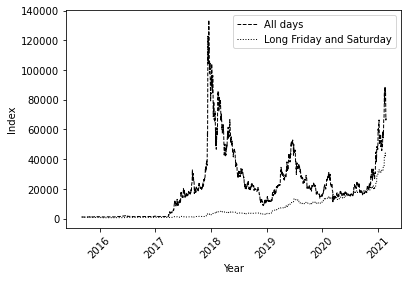

In [46]:
fig =plt.figure()
plt.plot(df2.index, df2.portfolio_all_days, linestyle='--', color="black",linewidth=1, label = "All days")
plt.plot(df2.index, df2.portfolio_Fri_Sat, linestyle=':', color="black",linewidth=1, label = "Long Friday and Saturday")
#plt.plot(df2.index, df2.portfolio_Fri, linestyle='--', color="black",linewidth=1, label = "Long Friday")
#plt.plot(df2.index, df2.portfolio_Sat, linestyle='--', color="black",linewidth=1, label = "Long Saturday")
#plt.plot(df2.index, df2.portfolio_Mo_Tues_Weds_Thurs_Sun, linestyle='--', color="black",linewidth=1, label = "Long all days expect Fri & Sat")
plt.xticks(rotation=45)
plt.ylabel("Index")
plt.xlabel("Year")
plt.legend()
plt.savefig('trading2.png',bbox_inches='tight')